# Data Analysis

In [1]:
# necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/riyamhatre/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# read in the data
data = pd.read_csv('/Users/riyamhatre/Desktop/data.csv')

## Cleaning the Data Before Conducting Analysis

In [3]:
def data_cleanup(data):
    # clean the columns
    data['Date'] = data['Timestamp'].apply(lambda x: x.split(' ')[0])
    data['Time'] = data['Timestamp'].apply(lambda x: x.split(' ')[1])
    cols = data.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    data = data[cols]
    data.columns = ['Date', "Time","Timestamp","Major","Year", "Space Use", "Preferred Space", "Describe Area", "Elaborate", "Favorite Part", "Importance", "Travel"]
    
    # clean the "Major" column
    data['Major'] = data['Major'].str.lower().str.strip()
    major_dict = {'red': 'real estate development', 
              'human bio':'human biology',
              "global healtb": 'global health', 
              "econ":"economics", "usp":'urban studies and planning', 
              "communication":'communications', 
              "psychology bs":'psychology', 
              "poli sci": 'political science',
             'gen bio/ gen psyc': 'general biology / general psychology',
             'cog sci ml': 'cognitive science',
             'international studies- political science': 'political science',
             'molecular and cell bio': 'molecular and cell biology',
             'political science public law': 'political science',}
    data['Major'] = data['Major'].replace(major_dict)
    
    return data
data = data_cleanup(data)

In [4]:
def flatten_extend(matrix): # compress nested lists in a column
    output = []
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    for i in flat_list:
        output.append(i.lstrip())
    return output

# divide the data up by date and time and create sub datasets
thursday_morning = data[(data["Date"] == '2/29/2024')& (data['Time']< '12:10:00')]
thursday_afternoon = data[(data["Date"] == '2/29/2024') &(data['Time']> '14:00:00')]
friday_morning = data[(data["Date"] == '3/1/2024') & (data['Time'] < '12:10:00')]
friday_afternoon = data[(data["Date"] == '3/1/2024') & (data['Time']> '14:00:00')]

# apply flatten_extend method to sub datasets
tm = flatten_extend(list(thursday_morning['Space Use'].str.split(',')))
ta = flatten_extend(list(thursday_afternoon['Space Use'].str.split(',')))
fm = flatten_extend(list(friday_morning['Space Use'].str.split(',')))
fa = flatten_extend(list(friday_afternoon['Space Use'].str.split(',')))

In [5]:
def dataframe(date, data, time): # create dataframes for each date
    df = pd.DataFrame()
    df['Date'] = [date]*len(data)
    df['Time'] = [time]*len(data)
    df['Activity'] = data
    return df

# concatinate the 4 dataframes 
frames = [dataframe('2/29/2024', tm, '11am-12pm'), dataframe('2/29/2024', ta, '3:30pm-4:30pm'),dataframe('3/1/2024', fm, '11am-12pm'),dataframe('3/1/2024', fa, '3:30pm-4:30pm')]
activity_data =pd.concat(frames)

# clean the data
activity_data['Activity'] = activity_data['Activity'].str.strip().replace({'Sunbathing':"Sun Bathing", 'Sun basking':"Sun Bathing", 
          'Sunbasking':"Sun Bathing", "Reading a book for fun": "Reading", 
          'I always come here when the sun is out and the weather is nice':'Sun Bathing'})
activity_data['Date+Time'] = activity_data['Date'] + ", " + activity_data['Time']

## Graphing

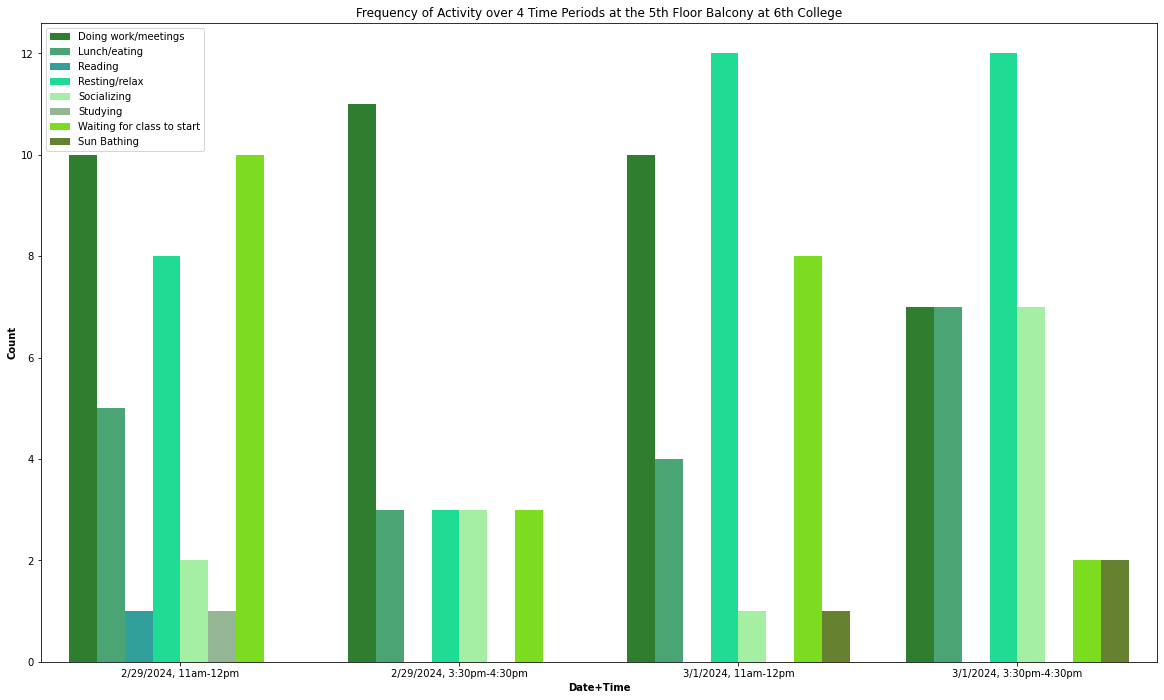

In [6]:
# create graph for frequency of activities across the 4 time periods
act_data = activity_data.groupby(['Date+Time', "Activity"]).count().reset_index().rename(columns ={'Date':'Count'})
plt.figure(figsize=(20,11.75))
ax = sns.barplot(x = 'Date+Time',
             y = 'Count',
             hue = 'Activity',
             data = act_data,
           palette = ['forestgreen', 'mediumseagreen', 'lightseagreen','mediumspringgreen', 'palegreen', 'darkseagreen', 'lawngreen', 'olivedrab'])
plt.legend(loc='upper left')
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Frequency of Activity over 4 Time Periods at the 5th Floor Balcony at 6th College');

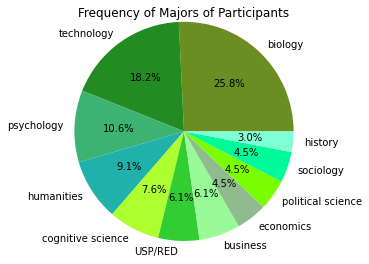

In [7]:
# group all majors into broad categories
cleaned_majors = []
for i in data['Major']:
    if 'biology' in i or 'health' in i or 'neuro' in i:
        cleaned_majors.append('biology')
    elif 'math' in i or "computer" in i or "data" in i or 'engineering' in i:
        cleaned_majors.append('technology')
    elif 'urban' in i or 'real' in i:
        cleaned_majors.append('USP/RED')
    elif 'art' in i or 'linguistic' in i or 'communication' in i or 'ethnic' in i:
        cleaned_majors.append('humanities')
    elif 'business' in i:
        cleaned_majors.append('business')
    elif 'psychology' in i:
        cleaned_majors.append('psychology')
    else:
        cleaned_majors.append(i)

# create a new column for cleaned majors
data['cleaned_majors'] = cleaned_majors

# get the frequency of each major
major_freq = pd.DataFrame(data.groupby('cleaned_majors')['Date'].count().sort_values(ascending = False)).reset_index()

# pie chart of the frequency of each major
fig, ax = plt.subplots()

ax.pie(major_freq['Date'], labels=major_freq['cleaned_majors'], 
       autopct='%1.1f%%',radius=1.26, 
       colors=['olivedrab', 'forestgreen', 'mediumseagreen', 
               'lightseagreen','greenyellow', 'limegreen', 
               'palegreen', 'darkseagreen', 'lawngreen', 'mediumspringgreen','aquamarine' ])
plt.title("Frequency of Majors of Participants");

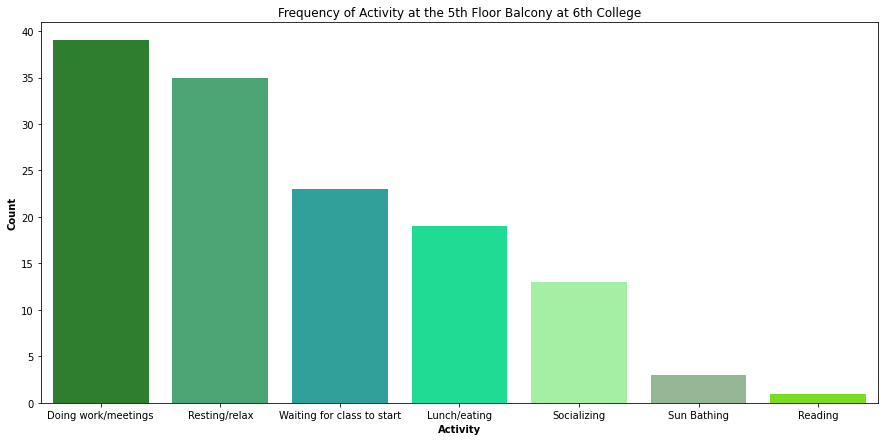

In [8]:
# bar graph of the total frequency of each activity
activity_data['Activity'] = activity_data['Activity'].replace({'Studying':"Doing work/meetings"})
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'Activity',
             y = 'Count',
             data = activity_data.groupby("Activity")['Date'].count().reset_index().sort_values(by = 'Date', ascending = False).rename(columns = {'Date':'Count'})
           , palette = ['forestgreen', 'mediumseagreen', 'lightseagreen','mediumspringgreen', 'palegreen', 'darkseagreen', 'lawngreen', 'olivedrab'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Frequency of Activity at the 5th Floor Balcony at 6th College');

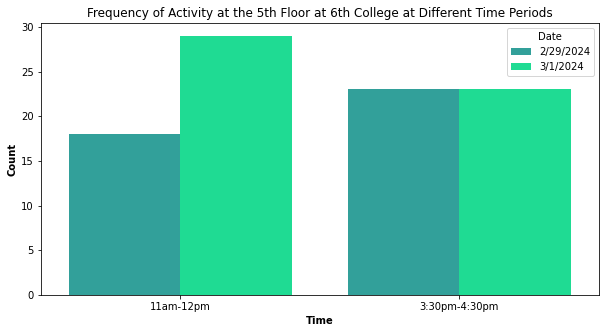

In [9]:
# bar graph of frequency of activity for each time slot
furniture = pd.read_csv('/Users/riyamhatre/Desktop/furniture.csv')
temp = furniture['Date'].str.split(', ')
furniture['Date'] = temp.apply(lambda x: x[0])
furniture['Time'] = temp.apply(lambda x: x[1])

plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'Time',
             y = 'Count',
            hue = 'Date',
             data = furniture.groupby(['Date', 'Time'])['Count'].sum().reset_index(), palette = ['lightseagreen','mediumspringgreen'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Frequency of Activity at the 5th Floor at 6th College at Different Time Periods');

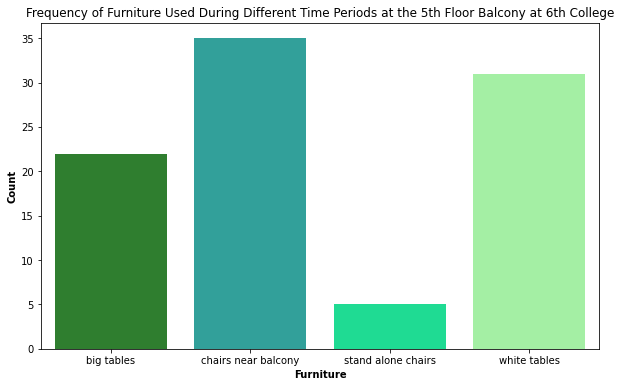

In [19]:
# read the furniture data 
# documents how many people used a type of furniture

# create separate columns for date and time

# bar graph for frequency of furniture for different time periods
plt.figure(figsize=(10,6))
ax = sns.barplot(x = 'Furniture',
             y = 'Count',
             data = furniture.groupby("Furniture")['Count'].sum().reset_index(), palette = ['forestgreen','lightseagreen','mediumspringgreen', 'palegreen'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Frequency of Furniture Used During Different Time Periods at the 5th Floor Balcony at 6th College');

In [11]:
# clean the column that documents the preferred spaces 
# for each participant
space_dict = {'Geisel library': 'Geisel Library', 'geisel':'Geisel Library',
             "I usually go to places that are convenient for where my meetings are or where my classes are. So far this quarter, I haven't been to RIWAC as much as like last quarter.": 'Areas Close to Classes',
             "I wait for my classes in nice places around my class. This spot is very relaxing and outdoors and next to my class in Catalyst. My preferred outdoor study place, for convenience, is the 6th floor patio of the keeling apartments.": "Areas Close to Classes",
             'Geisel':'Geisel Library', 'Not tellin': 'Other', "My dorm":'Dorm',
              "i go wherever is convenient for me after or during class": 'Areas Close to Classes',
             'Dib': 'Design and Innovation Building', "Geisel/Price Center/Galbraith" :'Geisel Library', 
              'usually dorm': 'Dorm' , 'Geisel/CSE Basement': "CSE Building", 'Cse building':'CSE Building', 
              'library': 'Geisel Library', 'Library':'Geisel Library', 'Yes': "Balcony at 6th "}

data['Preferred Space'] = data['Preferred Space'].str.strip()
data['cleaned_preferred_space'] = data['Preferred Space'].replace(space_dict)
preferred_space = data.groupby('cleaned_preferred_space')['Date'].count().reset_index().rename(columns ={'cleaned_preferred_space':'Preferred Space','Date':'Count'})

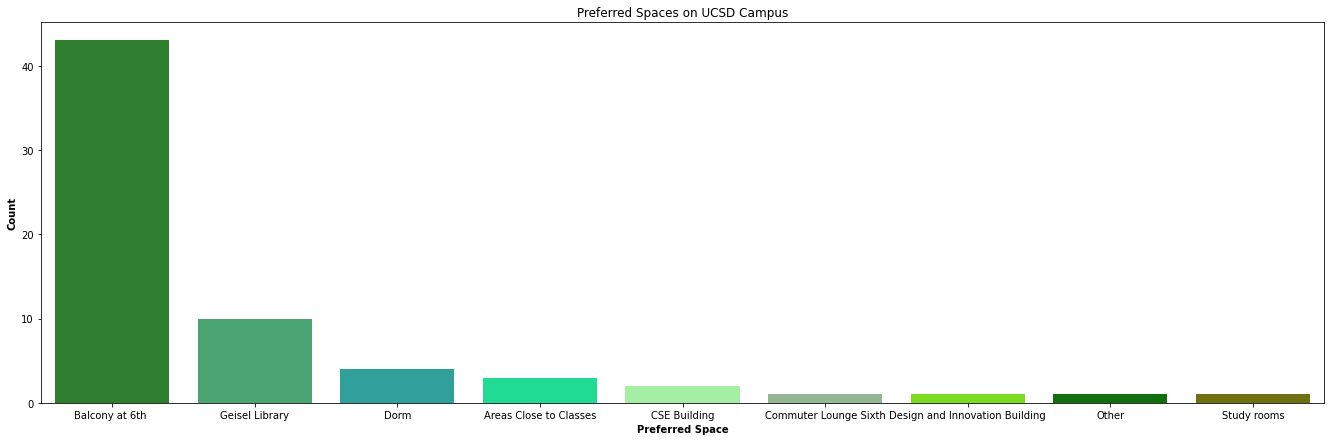

In [12]:
# bar plot for frequency of each preferred space
plt.figure(figsize=(23,7))
ax = sns.barplot(x = 'Preferred Space',
             y = 'Count',
             data = preferred_space.sort_values(by = 'Count', ascending = False), palette = ['forestgreen', 'mediumseagreen', 'lightseagreen','mediumspringgreen', 'palegreen', 'darkseagreen', 'lawngreen', 'green', 'olive'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Preferred Spaces on UCSD Campus');

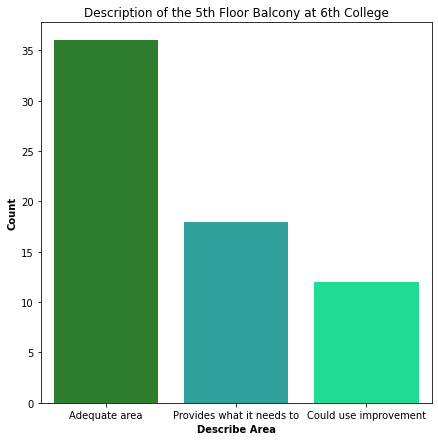

In [13]:
# plot for particpant description of the balcony
describe_area = data.groupby('Describe Area')['Date'].count().reset_index().rename(columns ={'Date':'Count'})
plt.figure(figsize=(7,7))
ax = sns.barplot(x = 'Describe Area',
             y = 'Count',
             data = describe_area.sort_values(by = 'Count', ascending = False), 
            palette = ['forestgreen','lightseagreen','mediumspringgreen'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Description of the 5th Floor Balcony at 6th College');

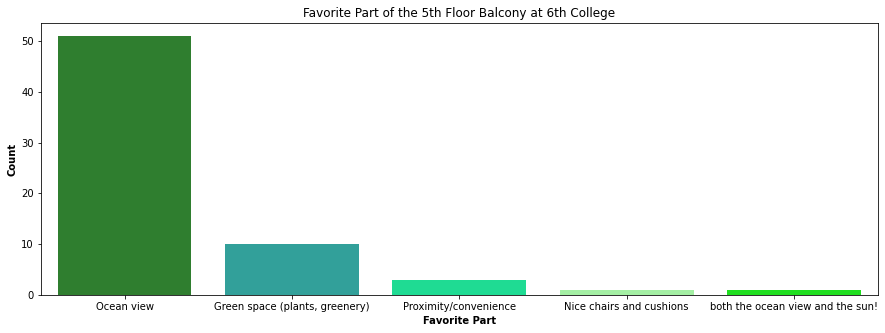

In [14]:
# bar plot for favorite part of the balcony 
favorite_part = data.groupby('Favorite Part')['Date'].count().reset_index().rename(columns ={'Date':'Count'}).sort_values(by = 'Count', ascending = False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'Favorite Part',
             y = 'Count',
             data = favorite_part.sort_values(by = 'Count', ascending = False), palette = ['forestgreen','lightseagreen','mediumspringgreen','palegreen', 'lime'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Favorite Part of the 5th Floor Balcony at 6th College');

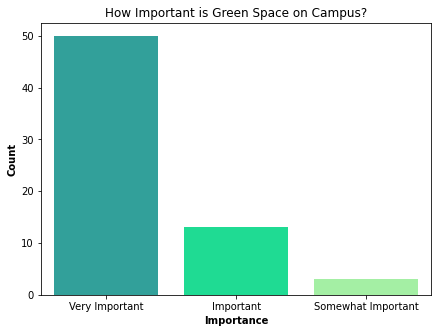

In [15]:
# bar graph depicting the importance of green space for each participant
importance = data.groupby('Importance')['Date'].count().reset_index().rename(columns ={'Date':'Count'}).sort_values(by = 'Count', ascending = False)
plt.figure(figsize=(7,5))
ax = sns.barplot(x = 'Importance',
             y = 'Count',
             data = importance.sort_values(by = 'Count', ascending = False), palette = ['lightseagreen','mediumspringgreen','palegreen'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('How Important is Green Space on Campus?');

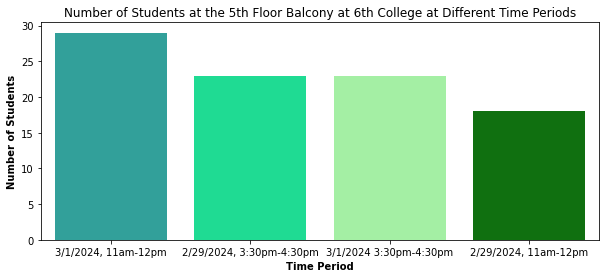

In [16]:
# bar plot for total population at different time frames
pop_data = pd.DataFrame({'Time Period':['2/29/2024, 11am-12pm', '2/29/2024, 3:30pm-4:30pm','3/1/2024, 11am-12pm','3/1/2024 3:30pm-4:30pm'], 
            'Number of Students': [18,23,29,23]})
plt.figure(figsize=(10,4))
ax = sns.barplot(x = 'Time Period',
             y = 'Number of Students',
             data = pop_data.sort_values(by = 'Number of Students', ascending = False), palette = ['lightseagreen','mediumspringgreen','palegreen', 'green'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Number of Students at the 5th Floor Balcony at 6th College at Different Time Periods');

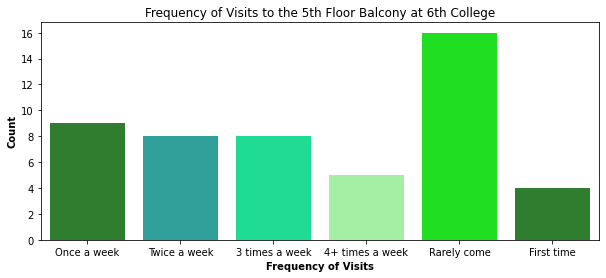

In [17]:
# read in the data
visit_freq = pd.read_csv('/Users/riyamhatre/Desktop/visit_freq.csv')

plt.figure(figsize=(10,4))
ax = sns.barplot(x = 'Frequency of Visits',
             y = 'Count',
             data = visit_freq, palette = ['forestgreen','lightseagreen','mediumspringgreen','palegreen', 'lime'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Frequency of Visits to the 5th Floor Balcony at 6th College');

## Sentiment Analysis

**Sentiment Analysis is the process of analyzing text to determine whether the intended emotion of the message is positive, negative, or neutral.**

In [18]:
# import necessary packages
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [19]:
# create preprocess_text function
def preprocess_text(text):
    tokens = word_tokenize(text.lower()) # convert all letters to lower case
    #remove "stopwords" punctuation and other unnecessary letters
    punctuation = [",", "’", '.','i','a', 's','t'] 
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    filtered_tokens = [token for token in tokens if token not in punctuation]
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# apply function to "Elaborate" column
# This column contains the opinions of participants regarding the space
data['filtered_elaborate'] = data['Elaborate'].apply(preprocess_text)

# get sentiment from the text
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# create a column of 1s and 0s called "sentiment"
# 1 is positive sentiment
# 0 is negative, or constructive criticism
data['Sentiment'] = data['filtered_elaborate'].apply(get_sentiment)

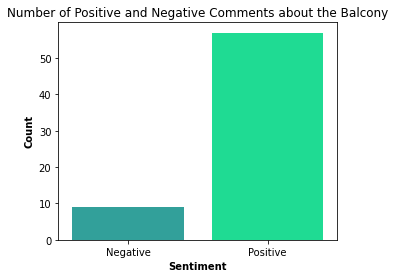

In [20]:
# bar plot number of positive and negative sentiment
sentiment = data.groupby('Sentiment')['Time'].count().reset_index().rename(columns= {"Time":"Count"})
sentiment['Sentiment'] = sentiment['Sentiment'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
plt.figure(figsize=(5,4))
ax = sns.barplot(x = 'Sentiment',
             y = 'Count',
             data = sentiment, palette = ['lightseagreen','mediumspringgreen'])
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.title('Number of Positive and Negative Comments about the Balcony');

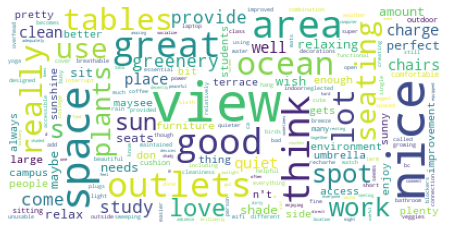

In [21]:
# compress the filtered_elaborate column 
# make it one large list of words 
words_list = flatten_extend(data['filtered_elaborate'].str.split(' '))

# create a word cloud to visualize the most common words
unique_string=(" ").join(words_list)
wordcloud = WordCloud(max_font_size=50,background_color="white").generate(unique_string)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis("off");